# Import Modules

In [40]:
# Common Imports
import keras
import numpy as np

# Data Imports
import pandas as pd

# Data Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Data Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model
from keras import layers
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
df = pd.read_csv('/content/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# statistical info
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Preprocessing Data

In [43]:
df = df.drop(columns = 'Id')

In [6]:
# checking null values
# Record feature names with extremely high null values
high_null_count_features = []

# Record total number of features with null values
null_feature_values = 0

for feature, null_count in df.isnull().sum().items():
    if null_count > 0:
        print(f"{feature:20} : {null_count:4}")
        null_feature_values += 1

    if null_count >= 1000:
        high_null_count_features.append(feature)

print(f"\nFeatures with Null Values: {null_feature_values}")
print(f"Features with High Null Values: {len(high_null_count_features)}")

LotFrontage          :  259
Alley                : 1369
MasVnrType           :    8
MasVnrArea           :    8
BsmtQual             :   37
BsmtCond             :   37
BsmtExposure         :   38
BsmtFinType1         :   37
BsmtFinType2         :   38
Electrical           :    1
FireplaceQu          :  690
GarageType           :   81
GarageYrBlt          :   81
GarageFinish         :   81
GarageQual           :   81
GarageCond           :   81
PoolQC               : 1453
Fence                : 1179
MiscFeature          : 1406

Features with Null Values: 19
Features with High Null Values: 4


In [7]:
# checking null values
# Record feature names with extremely high null values
high_null_count_features = []

# Record total number of features with null values
null_feature_values = 0

total_records = len(df)
threshold_percentage = 70  # Set your desired threshold percentage

for feature, null_count in df.isnull().sum().items():
    percentage_null = (null_count / total_records) * 100  # Define percentage_null here
    if null_count > 0:
        print(f"{feature:20} : {null_count:4} ({percentage_null:.2f}%)")
        null_feature_values += 1

    if percentage_null > threshold_percentage:
        high_null_count_features.append(feature)

print(f"\nFeatures with Null Values: {null_feature_values}")
print(f"Features with Null Values > {threshold_percentage}%: {len(high_null_count_features)}")

LotFrontage          :  259 (17.74%)
Alley                : 1369 (93.77%)
MasVnrType           :    8 (0.55%)
MasVnrArea           :    8 (0.55%)
BsmtQual             :   37 (2.53%)
BsmtCond             :   37 (2.53%)
BsmtExposure         :   38 (2.60%)
BsmtFinType1         :   37 (2.53%)
BsmtFinType2         :   38 (2.60%)
Electrical           :    1 (0.07%)
FireplaceQu          :  690 (47.26%)
GarageType           :   81 (5.55%)
GarageYrBlt          :   81 (5.55%)
GarageFinish         :   81 (5.55%)
GarageQual           :   81 (5.55%)
GarageCond           :   81 (5.55%)
PoolQC               : 1453 (99.52%)
Fence                : 1179 (80.75%)
MiscFeature          : 1406 (96.30%)

Features with Null Values: 19
Features with Null Values > 70%: 4


In [8]:
# Reanalysis of null values with data types
null_features = []
for feature, null_count in df.isnull().sum().items():
    if null_count > 0:
        print(f"{feature:20} -> {str(df[feature].dtype):10} -> {null_count:5}")
        null_feature_values += 1
        null_features.append(feature)

    if null_count >= 1000:
        high_null_count_features.append(feature)

LotFrontage          -> float64    ->   259
Alley                -> object     ->  1369
MasVnrType           -> object     ->     8
MasVnrArea           -> float64    ->     8
BsmtQual             -> object     ->    37
BsmtCond             -> object     ->    37
BsmtExposure         -> object     ->    38
BsmtFinType1         -> object     ->    37
BsmtFinType2         -> object     ->    38
Electrical           -> object     ->     1
FireplaceQu          -> object     ->   690
GarageType           -> object     ->    81
GarageYrBlt          -> float64    ->    81
GarageFinish         -> object     ->    81
GarageQual           -> object     ->    81
GarageCond           -> object     ->    81
PoolQC               -> object     ->  1453
Fence                -> object     ->  1179
MiscFeature          -> object     ->  1406


In [9]:
# Fill the missing values
from sklearn.impute import SimpleImputer
for feature in null_features:

    if str(df[feature].dtype) == "object":

        # Impute using Mode Values
        imputer = SimpleImputer(strategy = "most_frequent")
        df[feature] = imputer.fit_transform(df[feature].to_numpy().reshape(-1, 1)).ravel()

    else:
        # Impute using mean values
        imputer = SimpleImputer(strategy = "mean")
        df[feature] = imputer.fit_transform(df[feature].to_numpy().reshape(-1, 1)).ravel()

In [10]:
print(f"Null Values Left: {any(df.isnull().sum())}")

Null Values Left: False


In [11]:
# Record the feature and its respective encoder
encoders = {}

# Use ordinary encoder to convert category into numeric values
for feature in df.columns:
    if str(df[feature].dtype) == "object":

        # Initialize the ordinal encoder
        encoder = OrdinalEncoder()

        # Apply the ordinal encoder
        encoder.fit(df[feature].to_numpy().reshape(-1, 1))
        df[feature] = encoder.transform(df[feature].to_numpy().reshape(-1, 1)).ravel()

        # Save the encoder
        encoders[feature] = encoder

In [12]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Exploratory Data Analysis

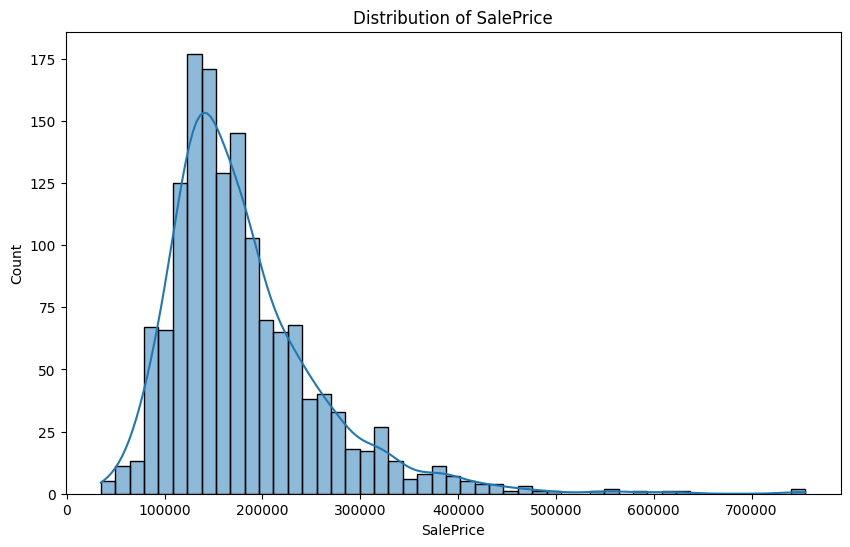

In [23]:
# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

In [31]:
# Compute Spearman correlation
import plotly.express as px
corr = df.corr(method = "spearman")
corr = corr[np.round(corr, 2) > .7]

# Visualize Spearman correlation
fig = px.imshow(corr, text_auto = True, height = 800, color_continuous_scale='gray')
fig.show()

In [32]:
fig = px.histogram(df, 'SalePrice', color="OverallQual", title="OverallQual vs SalePrice (0.8)")
fig.show()

fig = px.box(df, y = 'SalePrice', x = 'OverallQual', color="OverallQual", title="OverallQual vs SalePrice (0.8)")
fig.show()

In [33]:
fig = px.histogram(df, x='YearBuilt', y='GarageYrBlt', title="YearBuilt vs GarageYrBlt (0.8)", text_auto=True)
fig.show()

fig = px.scatter(df, x = 'YearBuilt', y = 'GarageYrBlt', title="YearBuilt vs GarageYrBlt (0.8)")
fig.show()

In [34]:
fig = px.histogram(df, x='Exterior1st', title="Histogram of Exterior1st", text_auto=True)
fig.show()

fig = px.histogram(df, x='Exterior2nd', title="Histogram of Exterior2nd", text_auto=True)
fig.show()

In [35]:
fig = px.histogram(df, x = 'TotalBsmtSF', y = '1stFlrSF', title="TotalBsmtSF vs 1stFlrSF (0.8)", text_auto=True)
fig.show()

fig = px.scatter(df, x = 'TotalBsmtSF', y = '1stFlrSF', title="TotalBsmtSF vs 1stFlrSF (0.8)")
fig.show()

In [36]:
fig = px.histogram(df, 'GrLivArea', color="TotRmsAbvGrd", title="TotRmsAbvGrd vs GrLivArea (0.8)")
fig.show()

fig = px.box(df, y = 'GrLivArea', x = 'TotRmsAbvGrd', color="TotRmsAbvGrd", title="TotRmsAbvGrd vs GrLivArea (0.8)")
fig.show()

In [37]:
fig = px.histogram(df, x='SalePrice', y='GarageYrBlt', title="SalePrice vs GarageYrBlt (0.8)", text_auto=True)
fig.show()

fig = px.scatter(df, x = 'SalePrice', y = 'GarageYrBlt', title="SalePrice vs GarageYrBlt (0.8)")
fig.show()

In [38]:
fig = px.histogram(df, 'GarageArea', color="GarageCars", title="GarageArea vs GarageCars (0.8)")
fig.show()

fig = px.box(df, y = 'GarageArea', x = 'GarageCars', color="GarageCars", title="GarageArea vs GarageCars (0.8)")
fig.show()

# Modeling

In [44]:
y = df.pop('SalePrice')
x = df

In [45]:
# applying standard scalar
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [46]:
# Splitting data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y,
    shuffle = True,
    random_state = 42,
    test_size = 0.25
)

In [47]:
def metrics(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    r2_s = r2_score(true, pred)
    return mse, mae, r2_s

In [48]:
# Record all the training and validation scores
model_names = []
train_mses = []
test_mses = []
train_maes = []
test_maes = []
train_r2s = []
test_r2s = []

In [49]:
# LinearRegression
model_name = "LinearRegression"

# Initialize and train the Model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Calculate metrices
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Append the metrics to the lists
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Print the appended results
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

Model Name : LinearRegression
Train MSE  : 862701446.0641017
Test MSE   : 1163863921.0822222
Train MAE  : 18505.891677984935
Test MAE   : 21628.969426776177
Train R2   : 0.8579083846595261
Test R2    : 0.8338597323277883


In [50]:
# SupportVectorRegression
model_name = "SupportVectorRegression"

# Initialize and train the Model
svr = SVR()
svr.fit(x_train, y_train)

# Calculate metrices
train_pred = svr.predict(x_train)
test_pred = svr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Append the metrics to the lists
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Print the appended results
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

Model Name : SupportVectorRegression
Train MSE  : 6346024871.004308
Test MSE   : 7183939018.368795
Train MAE  : 54964.59827204388
Test MAE   : 57183.510470619054
Train R2   : -0.04522477506641809
Test R2    : -0.02549922704264196


In [51]:
# DecisionTreeRegression
model_name = "DecisionTreeRegression"

# Initialize and train the Model
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

# Calculate metrices
train_pred = dtr.predict(x_train)
test_pred = dtr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Append the metrics to the lists
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Print the appended results
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

Model Name : DecisionTreeRegression
Train MSE  : 0.0
Test MSE   : 1755877211.2136986
Train MAE  : 0.0
Test MAE   : 26261.268493150685
Train R2   : 1.0
Test R2    : 0.7493505000143643


In [52]:
model_name = "DecisionTreeRegression(MD=5)"

# Initialize and train the Model
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(x_train, y_train)

# Calculate metrices
train_pred = dtr.predict(x_train)
test_pred = dtr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Append the metrics to the lists
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Print the appended results
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

Model Name : DecisionTreeRegression(MD=5)
Train MSE  : 798735260.7817721
Test MSE   : 1591091037.410442
Train MAE  : 20821.40418858876
Test MAE   : 27462.596958850085
Train R2   : 0.8684439629124678
Test R2    : 0.7728735412638047


In [53]:
# RandomForestRegression
model_name = "RandomForestRegression"

# Initialize and train the Model
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Calculate metrices
train_pred = rfr.predict(x_train)
test_pred = rfr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Append the metrics to the lists
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Print the appended results
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

Model Name : RandomForestRegression
Train MSE  : 122467601.9788802
Test MSE   : 736887067.4743943
Train MAE  : 6489.04606392694
Test MAE   : 16837.803589041094
Train R2   : 0.9798289205710219
Test R2    : 0.8948101986694903


In [54]:
# XGBRegressor
model_name = "XGBRegressor"

# Initialize and train the Model
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

# Calculate metrices
train_pred = xgb.predict(x_train)
test_pred = xgb.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Append the metrics to the lists
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Print the appended results
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

Model Name : XGBRegressor
Train MSE  : 867508.2271810174
Test MSE   : 674112139.5968006
Train MAE  : 648.0288027968037
Test MAE   : 16941.808743578767
Train R2   : 0.9998571166816936
Test R2    : 0.9037712491254486


In [59]:
# Model evaluation
model_evals = pd.DataFrame(data={
    "Models": model_names,
    "Train MSE": train_mses,
    "Test MSE": test_mses,
    "Train MAE": train_maes,
    "Test MAE": test_maes,
    "Train R2": train_r2s,
    "Test R2": test_r2s
})

In [62]:
# Train MSE Bar Graph
train_mse_bar = px.bar(model_evals, x = "Models", y = "Train MSE", title = "Train MSE Bar Graph", color="Models")
train_mse_bar.update_layout(showlegend=False)
train_mse_bar.show()

# Test MSE Bar Graph
test_mse_bar = px.bar(model_evals, x = "Models", y = "Test MSE", title = "Test MSE Bar Graph", color="Models")
test_mse_bar.update_layout(showlegend=False)
test_mse_bar.show()

In [64]:
# Train MAE Bar Graph
train_mae_bar = px.bar(model_evals, x = "Models", y = "Train MAE", title = "Train MSE Bar Graph", color="Models")
train_mae_bar.update_layout(showlegend=False)
train_mae_bar.show()

# Test MAE Bar Graph
test_mae_bar = px.bar(model_evals, x = "Models", y = "Test MAE", title = "Test MSE Bar Graph", color="Models")
test_mae_bar.update_layout(showlegend=False)
test_mae_bar.show()

In [65]:
# Train R2 Bar Graph
train_r2_bar = px.bar(model_evals, x="Models", y="Train R2", title="Train R2 Bar Graph", color="Models")
train_r2_bar.update_layout(showlegend=False)
train_r2_bar.show()

# Test R2 Bar Graph
test_r2_bar = px.bar(model_evals, x="Models", y="Test R2", title="Test R2 Bar Graph", color="Models")
test_r2_bar.update_layout(showlegend=False)
test_r2_bar.show()

# Implementing Neural Network

In [66]:
# Initialize the neural network
model_name = "NeuralNetwork"
net = keras.Sequential([
#     layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [67]:
# Compile the model
net.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(learning_rate = 1e-3)
)

# Train the Neural Network
net.fit(
    x_train, y_train,
    epochs = 20,
#     verbose = 0
)

# Calculate metrices
train_pred = net.predict(x_train, verbose = 0)
test_pred = net.predict(x_test, verbose = 0)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Print the appended results
print("\nModel Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

Epoch 1/20
35/35 [==============================] - 2s 5ms/step - loss: 39081025536.0000
Epoch 2/20
35/35 [==============================] - 0s 4ms/step - loss: 38709784576.0000
Epoch 3/20
35/35 [==============================] - 0s 4ms/step - loss: 33720090624.0000
Epoch 4/20
35/35 [==============================] - 0s 4ms/step - loss: 15628480512.0000
Epoch 5/20
35/35 [==============================] - 0s 4ms/step - loss: 6315412992.0000
Epoch 6/20
35/35 [==============================] - 0s 4ms/step - loss: 4100705792.0000
Epoch 7/20
35/35 [==============================] - 0s 4ms/step - loss: 3029219584.0000
Epoch 8/20
35/35 [==============================] - 0s 5ms/step - loss: 2510382592.0000
Epoch 9/20
35/35 [==============================] - 0s 4ms/step - loss: 2105712000.0000
Epoch 10/20
35/35 [==============================] - 0s 3ms/step - loss: 1851280256.0000
Epoch 11/20
35/35 [==============================] - 0s 3ms/step - loss: 1644380800.0000
Epoch 12/20
35/35 [=======